In [2]:
import argparse, csv, collections, numpy as np, pandas as pd
from ggplot import *
from sklearn.manifold import TSNE

# read through once to determine array size:
reader1 = csv.reader(open('doc2vec_sf_pgh_docvecs.csv'))
line1 = reader1.next()
ncol = len(line1) - 1 # -1 for neighborhood name.
nrows = 1 # we've read one so far
for line in reader1:
    nrows += 1

samples = np.zeros((nrows,ncol))
names = []
i = 0
for line in csv.reader(open('doc2vec_sf_pgh_docvecs.csv')):
    names.append(line[0].replace('NGHD_', ''))
    samples[i] = line[1:]
    i += 1

/Users/dantasse/src/neighborhood_guides/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
model = TSNE(perplexity=20, n_iter=5000)
tsne_points = model.fit_transform(samples)
print model.kl_divergence_


1.93156778812


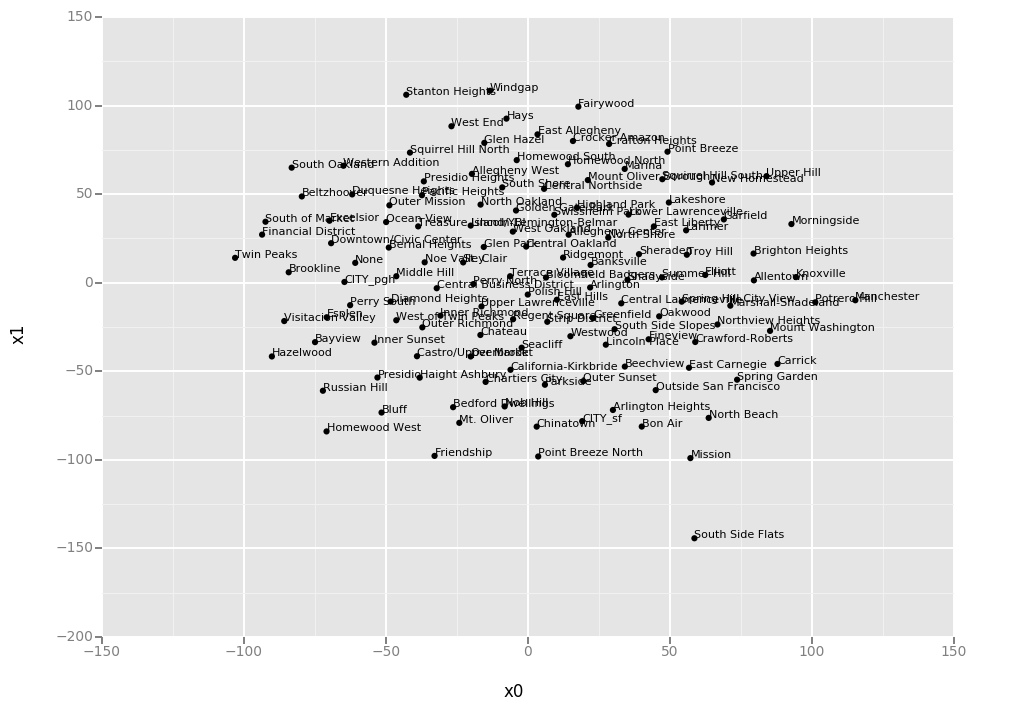

<ggplot: (281628389)>


In [12]:
df = pd.DataFrame(tsne_points)
df['nghd_names'] = names
df['x0'] = df[0]
df['x1'] = df[1]
plot = ggplot(df, aes(x='x0',y='x1', label="nghd_names")) + geom_point() + geom_text(size=8)
print plot

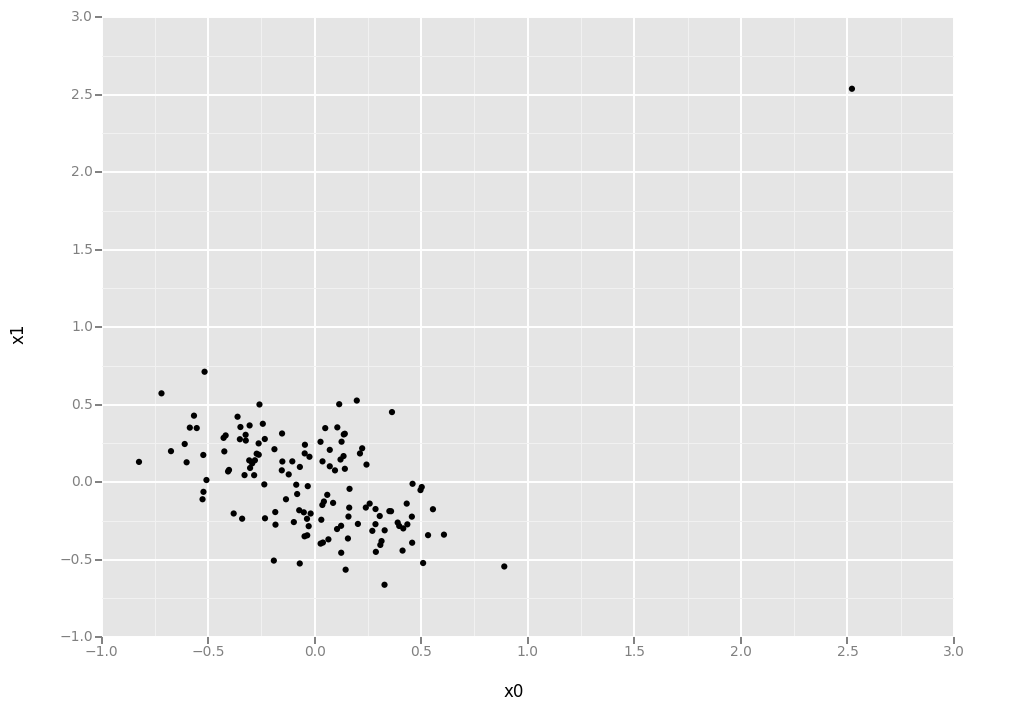

<ggplot: (279010993)>


In [15]:
# also try PCA into 2 dimensions and graph that, just to see if there actually is any hidden structure here - maybe not
from sklearn.decomposition import PCA
pca_model = PCA(n_components=3)
pc = pca_model.fit_transform(samples)
pca_df = pd.DataFrame(pc)
pca_df['nghd_names'] = names
pca_df['x0'] = pca_df[0]
pca_df['x1'] = pca_df[1]
plot = ggplot(pca_df, aes(x='x0',y='x1', label="nghd_names")) + geom_point() + geom_text(size=8)
print plot